In [1]:
# 导入math模块，用于数学计算
import math

# 导入numpy模块，用于科学计算，特别是多维数组操作
import numpy as np

# 导入matplotlib.pyplot模块，用于数据可视化
import matplotlib.pyplot as plt

# 插值法概念与性质

## 概念
插值法（Interpolation） 是一种在数学和计算机科学中广泛应用的数值分析方法。其基本思想是通过已知的一组离散的数据点（通常称为节点或样本点），构建一个函数（称为插值函数），使得这个函数能够恰好通过所有这些数据点。换句话说，插值法旨在找到一个函数$f(x)$，它在给定的节点$x_i$处的值与已知的数据值$y_i$相匹配，即满足条件$f(x_i) = y_i, i = 1, 2, ..., n$。这种方法常用于估计或恢复在两个或多个已知数据点之间的数据值。

## 常见插值方法
* 线性插值：最简单的一种插值方法，适用于两个数据点之间。通过直线连接这两个点来估计区间内的任意值。
* 多项式插值：包括拉格朗日插值、牛顿插值等，其中最常用的是拉格朗日插值法，通过构造一个n次多项式来精确通过n+1个数据点。
* 样条插值：如自然 cubic spline（三次样条插值）、Hermite 插值等，这类方法在保证通过所有数据点的同时，还考虑了平滑度等特性，通常用于要求导数连续的场景。
* 其他高级插值方法：如径向基函数插值、样条插值的变种等，它们在特定领域有更优的表现。

## 性质
* 精确性：理想的插值函数应精确通过所有给定的数据点，这是插值的基本要求。
* 连续性：插值函数在其定义域内应当是连续的。对于多项式插值和样条插值，通常还能保证一定阶数的导数连续。
* 光滑性：良好的插值方法应使得插值函数在数据点间变化平滑，避免出现不必要的波动或尖点。
* 稳定性：对于数据的小变动，插值结果应具有稳定性，即输入数据的微小变化不应导致输出结果发生剧烈变化。
* 计算复杂度：不同的插值方法在计算上有着不同的复杂度，选择时需考虑实际应用场景对计算效率的需求。
* 过拟合风险：特别是在使用高阶多项式插值时，虽然能完美匹配数据点，但可能在节点间产生大幅震荡，这被称为过拟合现象，影响预测的准确性。

在大致了解了基础概念后我们将插值分为了下面大致几类来介绍:
1. 标准多项式插值
2. 拉格朗日插值法
3. 牛顿插值法
4. 埃尔米特插值法
5. 分段线性插值
6. 样条插值

# 标准多项式插值:
我们现在有n+1个样本点对,我们需要去寻找一个多项式$f(x) \in \mathcal{P}_n$，使得$f(x_i) = y_i$,其中$(x_i,y_i)$为样本点。
$$
f(x) = a_0 + a_1x + a_2x^2 + \cdots + a_nx^n,\forall x \in \{x_i\}
$$

因此,我们将上式展开并写为矩阵形式,可以得到如下结果:
$$ A = 
\begin{pmatrix}
1 \quad x_0 \quad x_0^2 \quad \cdots \quad x_0^n \\
1 \quad x_1 \quad x_1^2 \quad \cdots \quad x_1^n \\
\vdots \\
1 \quad x_n \quad x_n^2 \quad \cdots \quad x_n^n \\
\end{pmatrix}
,
x = 
\begin{pmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n \\
\end{pmatrix}
,
b = 
\begin{pmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n \\
\end{pmatrix} \\
Ax = b
$$

$
\because 
\|A\| = 
\begin{vmatrix}
1 \quad x_0 \quad x_0^2 \quad \cdots \quad x_0^n \\
1 \quad x_1 \quad x_1^2 \quad \cdots \quad x_1^n \\
\vdots \\
1 \quad x_n \quad x_n^2 \quad \cdots \quad x_n^n \\
\end{vmatrix}
$
为Vandermonde行列式，其值等于$\prod\limits_{i,j 且 i!=j} {(x_i - x_j)} \neq 0 $，所以$Ax = b$有唯一解,此时其解可以通过解线性方程组得到.
## Tips:
我们并不推荐直接求解矩阵的逆来解这个问题，因为当n很大的时候，Vandermonde矩阵的条件数很大，矩阵较为病态，矩阵稳定性很差，求解矩阵逆时会很慢，而且容易出错。


In [2]:
def evaluate_polynomial(x, coefficients):
    """
    计算多项式函数的值
    
    :param x: 自变量
    :param coefficients: 多项式的系数
    :return: 多项式函数的值
    """
    s = sum(coefficients[i] * x ** i for i in range(len(coefficients)))
    
    return s

def standard_poly_interpolate(x_in, y_in, x):
    """
    通过多项式插值，计算给定自变量的因变量值
    
    :param x_in: 输入自变量数组
    :param y_in: 输入因变量数组
    :param x: 需要计算因变量值的自变量
    :return: 代入x的因变量值
    """
    
    
    if len(x_in) != len(y_in):
        raise ValueError("Error: The number of x and y is not equal.")
    
    n = len(x_in)

    # 使用 NumPy 的向量化操作构建 A 矩阵和 b 向量
    A = np.vander(x_in,n,increasing=True) ##increasing=True表示从最低次项开始从左至右
    
    b = np.array(y_in)

    try:
        param = np.linalg.solve(A, b)   # 矩阵求解
        
    except np.linalg.LinAlgError:
        
        raise ValueError("Error: The data points are collinear, resulting in a singular matrix.")
    
    if isinstance(x, (list,np.ndarray)):
        
        res = np.array([evaluate_polynomial(i, param) for i in x])
    
    elif isinstance(x, (int, float)):
        
        res = evaluate_polynomial(x, param)
    
    else:
        
        raise TypeError("Error: The type of x is not supported.")

        
    return (res, param)

[1. 0. 1.]


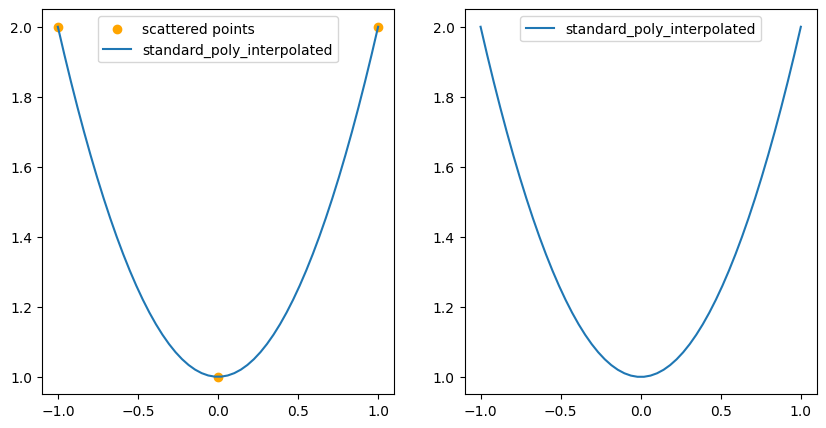

In [3]:
#a = [1, 2, 3, 4, 5, 6]
#b = [7, 9, 3, 7, 6, 99]
a = [-1,0,1]
b = [2,1,2]

x = np.linspace(-1, 1)
y1,params = standard_poly_interpolate(a,b,x)

print(params)

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1).scatter(a, b, color="orange")
plt.subplot(1,2,1).plot(x, y1)
plt.subplot(1,2,1).legend(["scattered points", "standard_poly_interpolated"])

plt.subplot(1,2,2).plot(x, y1)
plt.subplot(1,2,2).legend([ "standard_poly_interpolated"])
plt.show()

# 拉格朗日插值法（Lagrange Interpolation）
## 概念
拉格朗日插值法是一种在数学及数值分析领域广泛使用的多项式插值技术，其目的是找到一个唯一的n次多项式 $P(x)$，使得该多项式经过给定的n+1个数据点 $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$。换句话说，对于每个数据点 $i$（其中 $i=0, 1, ..., n$），多项式满足条件 $P(x_i) = y_i$。

## 拉格朗日插值公式
拉格朗日插值多项式可以表示为：

$$ P(x) = \sum_{i=0}^{n} y_i L_i(x) $$

其中，(L_i(x)) 是拉格朗日基多项式，定义为：

$$ L_i(x) = \prod_{j=0, j\neq i}^{n} \frac{x - x_j}{x_i - x_j} $$

## 性质
* 唯一性：对于给定的一组互异的数据点，存在且仅存在一个最高次不超过n的多项式满足插值条件。

* 插值误差：拉格朗日插值多项式在数据点外的估计误差与数据点的分布有关。理论上，如果被插值的函数是光滑的，并且数据点足够接近真实函数的值，那么插值多项式能较好地逼近原函数。然而，增加数据点的数量并不总是提高插值的准确性，尤其是在数据点分布不均匀或接近多项式次数的极限时，可能会引入振荡现象（龙格现象）。

* 复杂度：计算拉格朗日插值多项式的时间复杂度为O(n^2)，因为需要计算n+1个基多项式的乘积和求和，随着数据点数量的增加，计算成本迅速上升。

* 可加性与可乘性：如果有多组数据点集，分别通过拉格朗日插值得到多项式 $P_1(x)$ 和 $P_2(x)$，那么这两组数据点合并后可以通过这两个多项式的线性组合再 次进行拉格朗日插值，体现了插值的可加性。类似地，如果原函数可以分解为两个函数的乘积，那么也可以通过各自插值后再相乘的方式近似原函数，体现了一定程度上的可乘性。

* 稳定性：拉格朗日插值相对于牛顿插值而言，在数值稳定性上可能较差，特别是在数据点接近时，分母中的差值可能非常小，导致较大的舍入误差。

* 连续性和可导性：拉格朗日插值多项式在所有定义域内都是连续的，并且在数据点处至少具有直到 (n-1) 阶的导数，这是因为它是n次多项式。

In [4]:
## 原型拉格朗日插值法

def lagrange_polynomial(data, x):
    
    """
    计算拉格朗日插值多项式在点x处的值。
    
    参数:
    data -- 数据点列表，每个数据点为一个二元组 (x, y)。
    x -- 插值自变量的值。
    
    返回:
    拉格朗日插值多项式在点x处的值。
    """
    
    n = len(data)
    
    res = 0
    
    # 检查除数不为零
    for i in range(n):
        for j in range(n):
            if i != j and data[j][0] == data[i][0]:
                raise ValueError("Data points must be unique.")
    
    for i in range(n):
        
        y = 1
        
        for j in range(n):
            if i != j:
                y *= (x - data[j][0]) / (data[i][0] - data[j][0])
                
        y *= data[i][1]
        
        res += y
    
    return res


def lagrange_interpolate(x_in, y_in, x):
    
    """
    使用拉格朗日插值法进行数据插值。
    
    参数:
    x_in -- x轴的值列表。
    y_in -- y轴的值列表。
    x -- 插值自变量。
    
    返回:
    在插值自变量x处的插值结果。
    """
    
    if len(x_in) != len(y_in):
        raise ValueError("The length of x_in and y_in should be equal")
    
    if len(x_in) < 2:
        raise ValueError("At least two data points are required for interpolation.")
    
    n = len(x_in)
    
    if isinstance(x, (list,np.ndarray)):
        
        res = np.array([lagrange_polynomial(list(zip(x_in, y_in)), x_i) for i, x_i in enumerate(x)])
        
    elif isinstance(x, (int, float)):
        
        res = lagrange_polynomial(list(zip(x_in, y_in)), x)
        
    else:
        raise TypeError("x must be a list, numpy array, or a number.")

    return res

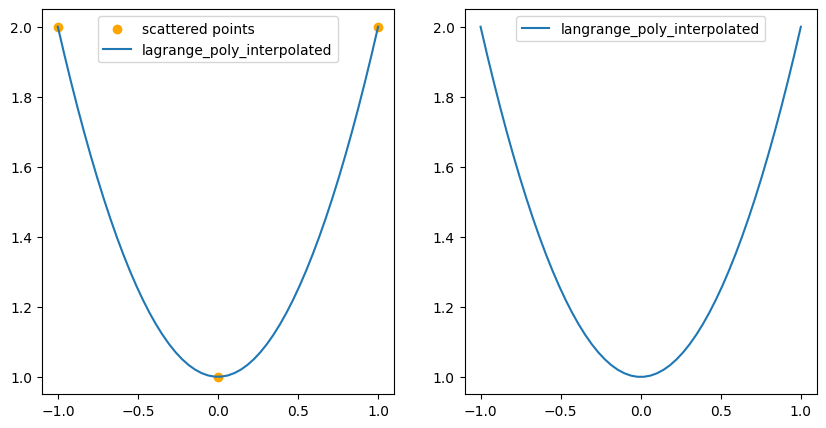

In [5]:
y2 = lagrange_interpolate(a,b,x)

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1).scatter(a, b, color="orange")
plt.subplot(1,2,1).plot(x, y2)
plt.subplot(1,2,1).legend(["scattered points", "lagrange_poly_interpolated"])

plt.subplot(1,2,2).plot(x, y2)
plt.subplot(1,2,2).legend([ "langrange_poly_interpolated"])

我们可以对lagrange插值法进行误差分析,容易得到一个结论,即:
$$
\sum\limits_{i = 0}^n x_i^kl_i(x) = x_i^k,\forall k = 0,1,\cdots,n
$$,
由此,我们会得到一个重要结论,即:
$$
\sum\limits_{i = 0}^nl_i(x) = 1
$$,
即`lagrange基函数之和恒等于1`  
由这一结论支撑,我们对原型lagrange做变换可以得到`重心坐标lagrange插值公式`如下:

$$
P_{n} = \frac{\sum_{k = 0}^{n} \frac{f_k}{(x - x_k) * \prod_{i = 0 and i != j}^{n}(x_k - x_i)}}{\sum_{k = 0}^{n} \frac{1}{(x - x_k) * \prod_{i = 0 and i != j}^{n}(x_k - x_i)}}
$$

具体的推导过程从略

In [6]:
## 拉格朗日重心坐标型

def lagrange_gravity_interpolate(x_in, y_in, x):

    if isinstance(x, (list,np.ndarray)):

        res = np.zeros_like(x)
        
        n = len(x_in)
        
        for k,x0 in enumerate(x):
            
            tag = 0
        
            div1 = 0
            
            div2 = 0
            
            for i in range(n):
                
                param = 1

                if x0 == x_in[i]:
                    
                    tag = 1
                    
                    break
                    
                for j in range(n):
                    
                    if i != j:
                        
                        param = param * (x_in[i] - x_in[j])

                div1 = div1 + y_in[i] / ((x0 - x_in[i]) * param)
                
                div2 = div2 + 1 / ((x0 - x_in[i]) * param)
            
            if tag == 1:
                
                res[k] = y_in[i]
                
                continue
            
            else:
               
                res[k] = (div1 / div2)
        
        return res
        
    elif isinstance(x, (int, float)):
        
        print(2)
        
        div1 = 0
        
        div2 = 0
        
        n = len(x_in)
        
        for i in range(n):
            
            param = 1

            if x == x_in[i]:
                
                return y_in[i]
                
            for j in range(n):
                
                if i != j:
                    
                    param = param * (x_in[i] - x_in[j])

            div1 = div1 + y_in[i]/((x - x_in[i]) * param)
            
            div2 = div2 + 1 / ((x - x_in[i]) * param)
            
            res = div1 / div2
            
        return res
        
    else:
        
        raise TypeError("x must be a list, numpy array, or a number.")

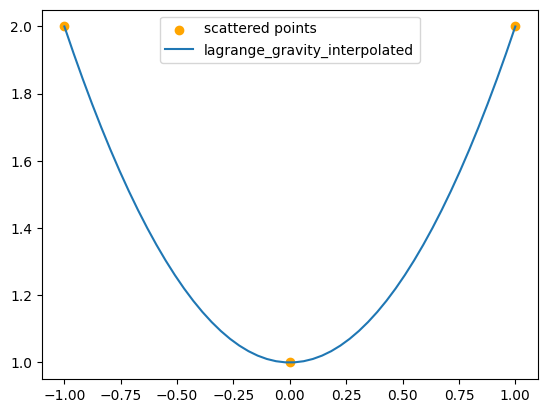

In [7]:
y3 = lagrange_gravity_interpolate(a, b, x)

plt.scatter(a,b,color = "orange")
plt.plot(x,y3)
plt.legend(["scattered points","lagrange_gravity_interpolated"])
plt.show()

# 牛顿插值法概念

牛顿插值法（Newton's Interpolation）是一种数值分析中的多项式插值技术，用于估计或恢复未知函数在某一区间内任意点的值。该方法基于已知的函数值集合（通常是离散的数据点），构建一个插值多项式，使得这个多项式在每个已知点上的值与实际函数值相等。牛顿插值法的核心在于使用差商（divided differences）来逐步构建插值多项式，它与拉格朗日插值法相比，具有较好的计算效率和承袭性特点。

## 核心思想

* 差商：类似于导数，但适用于离散数据点，表示两个点间函数值的变化率。
* 基多项式：一系列简单多项式，每个基多项式在其中一个插值点取值为1，其余点取值为0。
* 牛顿插值公式：通过累乘基多项式并结合差商构造出整个插值多项式。

## 牛顿插值法性质
* 承袭性：当增加新的数据点时，无需重新计算之前的所有差商，只需对新增点相关的差商进行更新，这大大提高了算法的效率。

* 灵活性：可以容易地适应数据点的增减，调整插值多项式的阶数。

* 计算效率：对于大量数据点的插值，牛顿法相较于直接使用拉格朗日插值法更为高效，尤其是在利用先前计算结果的情况下。

* 稳定性：尽管牛顿插值法在理论上可以精确通过所有已知点，但在实践中，高阶插值多项式可能对数据噪声敏感，导致在插值点外的预测不稳定。

* 适用范围：适合于需要高效插入或删除数据点的场景，以及当插值点数量变化不大时的连续更新。

## 实现步骤
1. 计算差商表：首先计算一阶差商，然后基于一阶差商计算二阶差商，以此类推，直至最高阶差商。

2. 构建插值多项式：利用差商表和基多项式构建最终的插值多项式，其中多项式的每一项对应一个差商值与相应基多项式的乘积之和。

## 应用场景
牛顿插值法广泛应用于科学计算、工程设计、数据分析等领域，特别是在需要快速响应数据变化且频繁进行插值计算的场合，如金融模型预测、物理实验数据拟合、气象数据分析等。

In [8]:
def difference_quotient_list(y_list,x_list = None):
    
    if x_list is None:
        
        x_list = [i for i in range(len(y_list))]
        
    prev_list = y_list
    
    dq_list = []
    
    dq_list.append(prev_list[0])
    
    for t in range(1,len(y_list)):
        prev,curr = 0,0  
        m = []
        k = -1
        for i in prev_list:
            curr = i
            m.append((curr - prev)/(x_list[k+t]-x_list[k]))
            prev = i
            k+=1
        m.pop(0)     
        prev_list = m
        dq_list.append(prev_list[0])
    return dq_list


def newton_interpolate(x_in,y_in,x):
    
    coef = difference_quotient_list(y_in,x_in)
    
    if isinstance(x, (list,np.ndarray)):
        
        res = np.zeros_like(x)
        
        for j,xi in enumerate(x):
            
            param = 1
        
            for i in range(len(coef)):
                
                res[j] += coef[i]*param
                
                param *= xi - x_in[i]
        
    elif isinstance(x, (int, float)):
        
        res = 0
        
        param = 1
        
        for i in range(len(coef)):
            
            res += coef[i]*param
            
            param *= x - x_in[i]
        
    else:
        
        raise TypeError("x must be a list, numpy array, or a number.")

    return res,coef

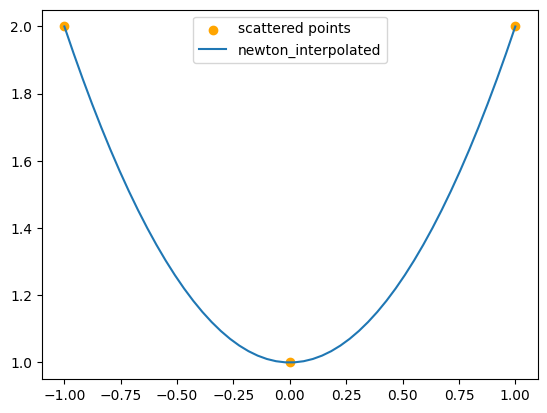

In [9]:
y4,params = newton_interpolate(a,b,x)

plt.scatter(a,b,color = "orange")
plt.plot(x,y4)
plt.legend(["scattered points","newton_interpolated"])
plt.show()

# 埃尔米特插值法(Hermite Interpolation)
## 概念
埃尔米特插值法是一种多项式插值方法，它不仅考虑了数据点的值，还考虑了数据点处导数值的信息。与拉格朗日插值法和牛顿插值法相比，埃尔米特插值法能够在已知数据点及其一阶导数值（或更高阶导数值）的情况下，构造一个插值多项式。这意味着，除了通过给定点，插值多项式还在这些点的切线方向与给定的一阶导数值相匹配，从而提供了更精确的局部行为描述。

形式上，假设我们有$n+1$个数据点$(x_0, y_0, f_0), (x_1, y_1, f_1), ..., (x_n, y_n, f_n)$，其中$y_i$是$x_i$处的函数值，而$f_i$是$x_i$处的导数值。埃尔米特插值问题是要找到一个$n$次多项式$H(x)$满足：

$$ H(x_i) = y_i, \quad H'(x_i) = f_i, \quad i = 0, 1, ..., n $$

## 性质
* 唯一性: 给定不同数据点和导数值的组合，存在且仅存在一个最高次数不超过$2n$的多项式满足埃尔米特插值条件。

* 误差估计: 类似于其他插值方法，埃尔米特插值多项式在插值节点上完美匹配给定的值和导数值，但在节点之间可能有误差。根据罗尔定理和柯西定理，埃尔米特插值多项式的最大误差可以通过分析插值区间上的最高导数的连续性来估计。

* 稳定性: 埃尔米特插值相对于数据的小变动相对稳定，因为它考虑了导数信息，这有助于在数据点附近形成更平滑的曲线，减少因数据噪声导致的过拟合现象。

* 计算复杂性: 直接构建埃尔米特插值多项式可能涉及复杂的计算过程，尤其是当考虑高阶导数值时。实践中，通常采用分段多项式（如埃尔米特样条）来简化计算并保持局部光滑性。

* 应用领域: 埃尔米特插值法在物理、工程、经济学等领域有广泛应用，特别是在那些需要精确模拟数据点附近函数行为（如斜率或曲率）的场景中。

## 实现方法
埃尔米特插值多项式可以通过构建一个特殊的埃尔米特基多项式系统来获得，这些基多项式在每个节点上满足特定的值和导数值条件。具体构造过程涉及解决一个带有特定约束条件的线性方程组，或者利用已有的数学软件和库中的内置函数来直接计算。

# 三次样条插值(Spline Interpolation)
## 概念
三次样条插值是一种高级的插值技术，用于在一组离散数据点之间构造一个平滑的曲线。它通过一系列连续的三次多项式分段定义一个函数，这些多项式在每个数据点处不仅保证值的连续性，还保证一阶导数和二阶导数的连续性，从而使得整个曲线显得非常平滑。每个这样的分段多项式称为一个“样条”。

具体来说，如果有$n+1$个数据点$(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$，三次样条插值会找到一个由$n$个三次多项式组成的函数$S(x)$，使得在每个区间$[x_i, x_{i+1}]$上，$S(x)$是一个三次多项式，且满足以下条件：

* $S(x_i) = y_i$，即在每个数据点上值相等。
* $S'(x_i) = m_i$，在某些情况下，还可以指定每个点的导数值，但通常默认两端导数为自然边界条件（二阶导数在端点为零）。
* $S''(x_i) = S''(x_{i+1})$，即在相邻区间的交界处二阶导数连续。


## 性质
* 连续性与光滑性: 三次样条插值保证了一阶和二阶导数的连续性，因此在连接点处没有突变，图形平滑过渡，适合表示具有连续变化趋势的数据。

* 局部性: 每个分段多项式只依赖于它所在区间及邻近区间的几个数据点，这样局部数据的变化不会影响整个曲线的形状，提高了计算效率和稳定性。

* 灵活性: 通过调整边界条件（如自然边界、非自然边界或非零边界导数），三次样条可以适应不同的应用场景需求。

* 计算效率: 虽然构造过程涉及解线性方程组，但得益于其结构特性，可以通过高效的算法（如三对角矩阵法）快速求解。

* 误差估计: 与其它插值方法一样，三次样条插值在插值节点上完美匹配数据点，而在节点间可能存在一定的插值误差，但通常情况下，由于其平滑性，这种误差相较于其他简单方法（如线性插值）要小。

* 应用广泛: 三次样条插值因其平滑性和高效性，在科学计算、工程设计、图形绘制、数据分析等领域有着广泛的应用。

## 实现方法
实现三次样条插值通常需要解决一个由边界条件和连续性条件构成的线性方程组。这个方程组可以被组织成一个三对角矩阵的形式，从而利用专门的算法高效求解。现代编程语言和数学软件库（如Python的Scipy库、MATLAB等）都提供了内置函数来直接完成三次样条插值的计算，大大简化了其实现过程。

总结而言，三次样条插值是一种强大且灵活的插值方法，它通过构建一系列连续且平滑的三次多项式分段，实现了对数据点的精确和光滑拟合，适用于对平滑度有较高要求的插值任务.  
以下是其一个较为简单的表达式
$$
S(x) = -M_{j} \frac{(x_{j+1} - x)^2}{2h_j} + M_{j+1} \frac{(x - x_j)^2}{2h_j} + (y_j - \frac{M_{j} h_{j}^2}{6})\frac{x_{j+1} - x}{h_j} + (y_{j+1} - \frac{M_{j+1} h_{j}^2}{6})\frac{x - x_j}{h_j}
\\
$$
式中各个未知量表示为:
$$
h_j = x_{j+1} - x_j , M_j{\text 为S''(x)的线性系数} \quad 
$$

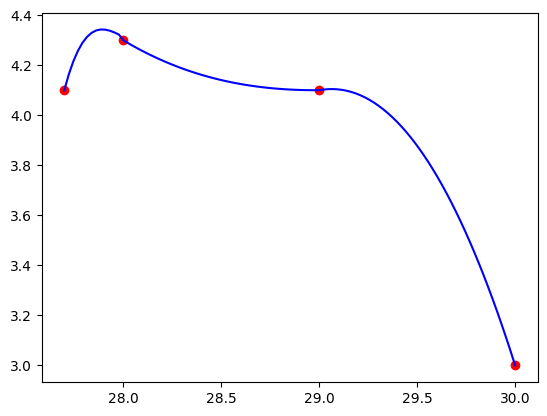

In [10]:
def div_value(xin,yin,i,j):
    
    """
    
    差商计算
    
    """
    
    return (yin[i] - yin[j])/(xin[i]-xin[j])


def calculateEquationParameters(x):
    
    """
    
    功能：完后对三次样条函数求解方程参数的输入
    参数：要进行三次样条曲线计算的自变量
    返回值：方程的参数

    """

    #parameter为二维数组，用来存放参数，sizeOfInterval是用来存放区间的个数
    parameter = []
    sizeOfInterval=len(x)-1
    i = 1
    #首先输入方程两边相邻节点处函数值相等的方程为2n-2个方程
    while i < len(x)-1:
        data = np.zeros(sizeOfInterval*4)
        data[(i-1)*4] = x[i]*x[i]*x[i]
        data[(i-1)*4+1] = x[i]*x[i]
        data[(i-1)*4+2] = x[i]
        data[(i-1)*4+3] = 1
        data1 = np.zeros(sizeOfInterval*4)
        data1[i*4] =x[i]*x[i]*x[i]
        data1[i*4+1] =x[i]*x[i]
        data1[i*4+2] =x[i]
        data1[i*4+3] = 1
        temp = data[2:]
        parameter.append(temp)
        temp = data1[2:]
        parameter.append(temp)
        i += 1
        
    # 输入端点处的函数值。为两个方程, 加上前面的2n - 2个方程，一共2n个方程
    data = np.zeros(sizeOfInterval * 4 - 2)
    data[0] = x[0]
    data[1] = 1
    parameter.append(data)
    data = np.zeros(sizeOfInterval * 4)
    data[(sizeOfInterval - 1) * 4 ] = x[-1] * x[-1] * x[-1]
    data[(sizeOfInterval - 1) * 4 + 1] = x[-1] * x[-1]
    data[(sizeOfInterval - 1) * 4 + 2] = x[-1]
    data[(sizeOfInterval - 1) * 4 + 3] = 1
    temp = data[2:]
    parameter.append(temp)
    
    # 端点函数一阶导数值相等为n-1个方程。加上前面的方程为3n-1个方程。
    i=1
    while i < sizeOfInterval:
        data = np.zeros(sizeOfInterval * 4)
        data[(i - 1) * 4] = 3 * x[i] * x[i]
        data[(i - 1) * 4 + 1] = 2 * x[i]
        data[(i - 1) * 4 + 2] = 1
        data[i * 4] = -3 * x[i] * x[i]
        data[i * 4 + 1] = -2 * x[i]
        data[i * 4 + 2] = -1
        temp = data[2:]
        parameter.append(temp)
        i += 1
    # 端点函数二阶导数值相等为n-1个方程。加上前面的方程为4n-2个方程。且端点处的函数值的二阶导数为零，为两个方程。总共为4n个方程。
    i = 1
    while i < len(x) - 1:
        data = np.zeros(sizeOfInterval * 4)
        data[(i - 1) * 4] = 6 * x[i]
        data[(i - 1) * 4 + 1] = 2
        data[i * 4] = -6 * x[i]
        data[i * 4 + 1] = -2
        temp = data[2:]
        parameter.append(temp)
        i += 1
    return parameter


def calculate(paremeters,x):
    """
    
    功能：根据所给参数，计算三次函数的函数值：
    参数:parameters为二次函数的系数,x为自变量
    返回值：为函数的因变量

    """
    result=[]
    
    for data_x in x:
        
        result.append(paremeters[0]*data_x**3+paremeters[1]*data_x**2+paremeters[2]*data_x+paremeters[3])
    
    return  result


def spline(xin,yin,x,partial_y = [0,0]):
    '''三次样条插值(边界点导数值)'''

    n = len(xin)
    
    o = np.zeros((n,n))

    H = list()
    for i in range(n-1):
        H.append(xin[i+1]-xin[i])


    lambdat = list()

    lambdat.append(1)

    miut = list()
    d = list()

    d.append(6 * (((yin[1] - yin[0])/(xin[1] - xin[0])) - partial_y[0])/H[0])

    for i in range(1,n-1):
        miut.append(H[i-1] / (H[i-1] + H[i]))
        lambdat.append(H[i] / (H[i] + H[i-1]))
        d.append(6*(div_value(xin,yin,i,i+1) - div_value(xin,yin,i-1,i)) / (H[i] + H[i-1]))

    miut.append(1)
    d.append(6*(partial_y[1] - div_value(xin,yin,n-2,n-1))/H[n-2])


    for i in range(n):
        for j in range(n):
            if j == i+1:
                o[i][j] = lambdat[i]
            elif j == i-1:
                o[i][j] = miut[j]
            elif j == i:
                o[i][j] = 2.0
            else:
                o[i][j] = 0


    d_array = np.array(d).reshape(-1,1)

    M = np.linalg.solve(o,d_array)

    for i in range(n-1):
        if x >= xin[i] and x<=xin[i+1]:
            res = M[i]*((xin[i+1] - x)**3 / (6*H[i])) + \
                  M[i+1] * ((x-xin[i])**2) / (6*H[i]) + \
                  (yin[i] - M[i]*(H[i]**2) / 6)*((xin[i+1] - x)/H[i]) + \
                  (yin[i+1] - M[i+1]*(H[i]**2) / 6)*((x-xin[i])/H[i])
            return res



xt = [27.7,28,29,30]
yt = [4.1,4.3,4.1,3.0]
partial_y = [3.0,-4.0]

xp = np.linspace(27.7,30.0,100)
y = list(map(lambda t: spline(xt,yt,t,partial_y),xp))

plt.scatter(xt,yt,color = "Red")
plt.plot(xp,y,color = "Blue")
plt.show()

已知等距插值节点在某些函数上并不稳定,容易出现Runge现象,因此我们选取Chebyshev节点  
选取Chebyshev节点最主要的原因是Chebyshev多项式在多项式空间内具有最小的最大误差,即:
$$
\max\limits_{x \in [-1,1]} |f(x) - T(x)| = \min\limits_{p(x) \in \phi} \max\limits_{x \in [-1,1]} |f(x) - P(x)|
$$
因此,选取Chebyshev节点可以得到最小的最大误差,因此在理论上保证了收敛性  
而Chebyshev节点我们可以通过公式:
$$
x_k = \cos(\frac{2k - 1}{2n} \pi),k = 1,2,\cdots,n
$$
来得到

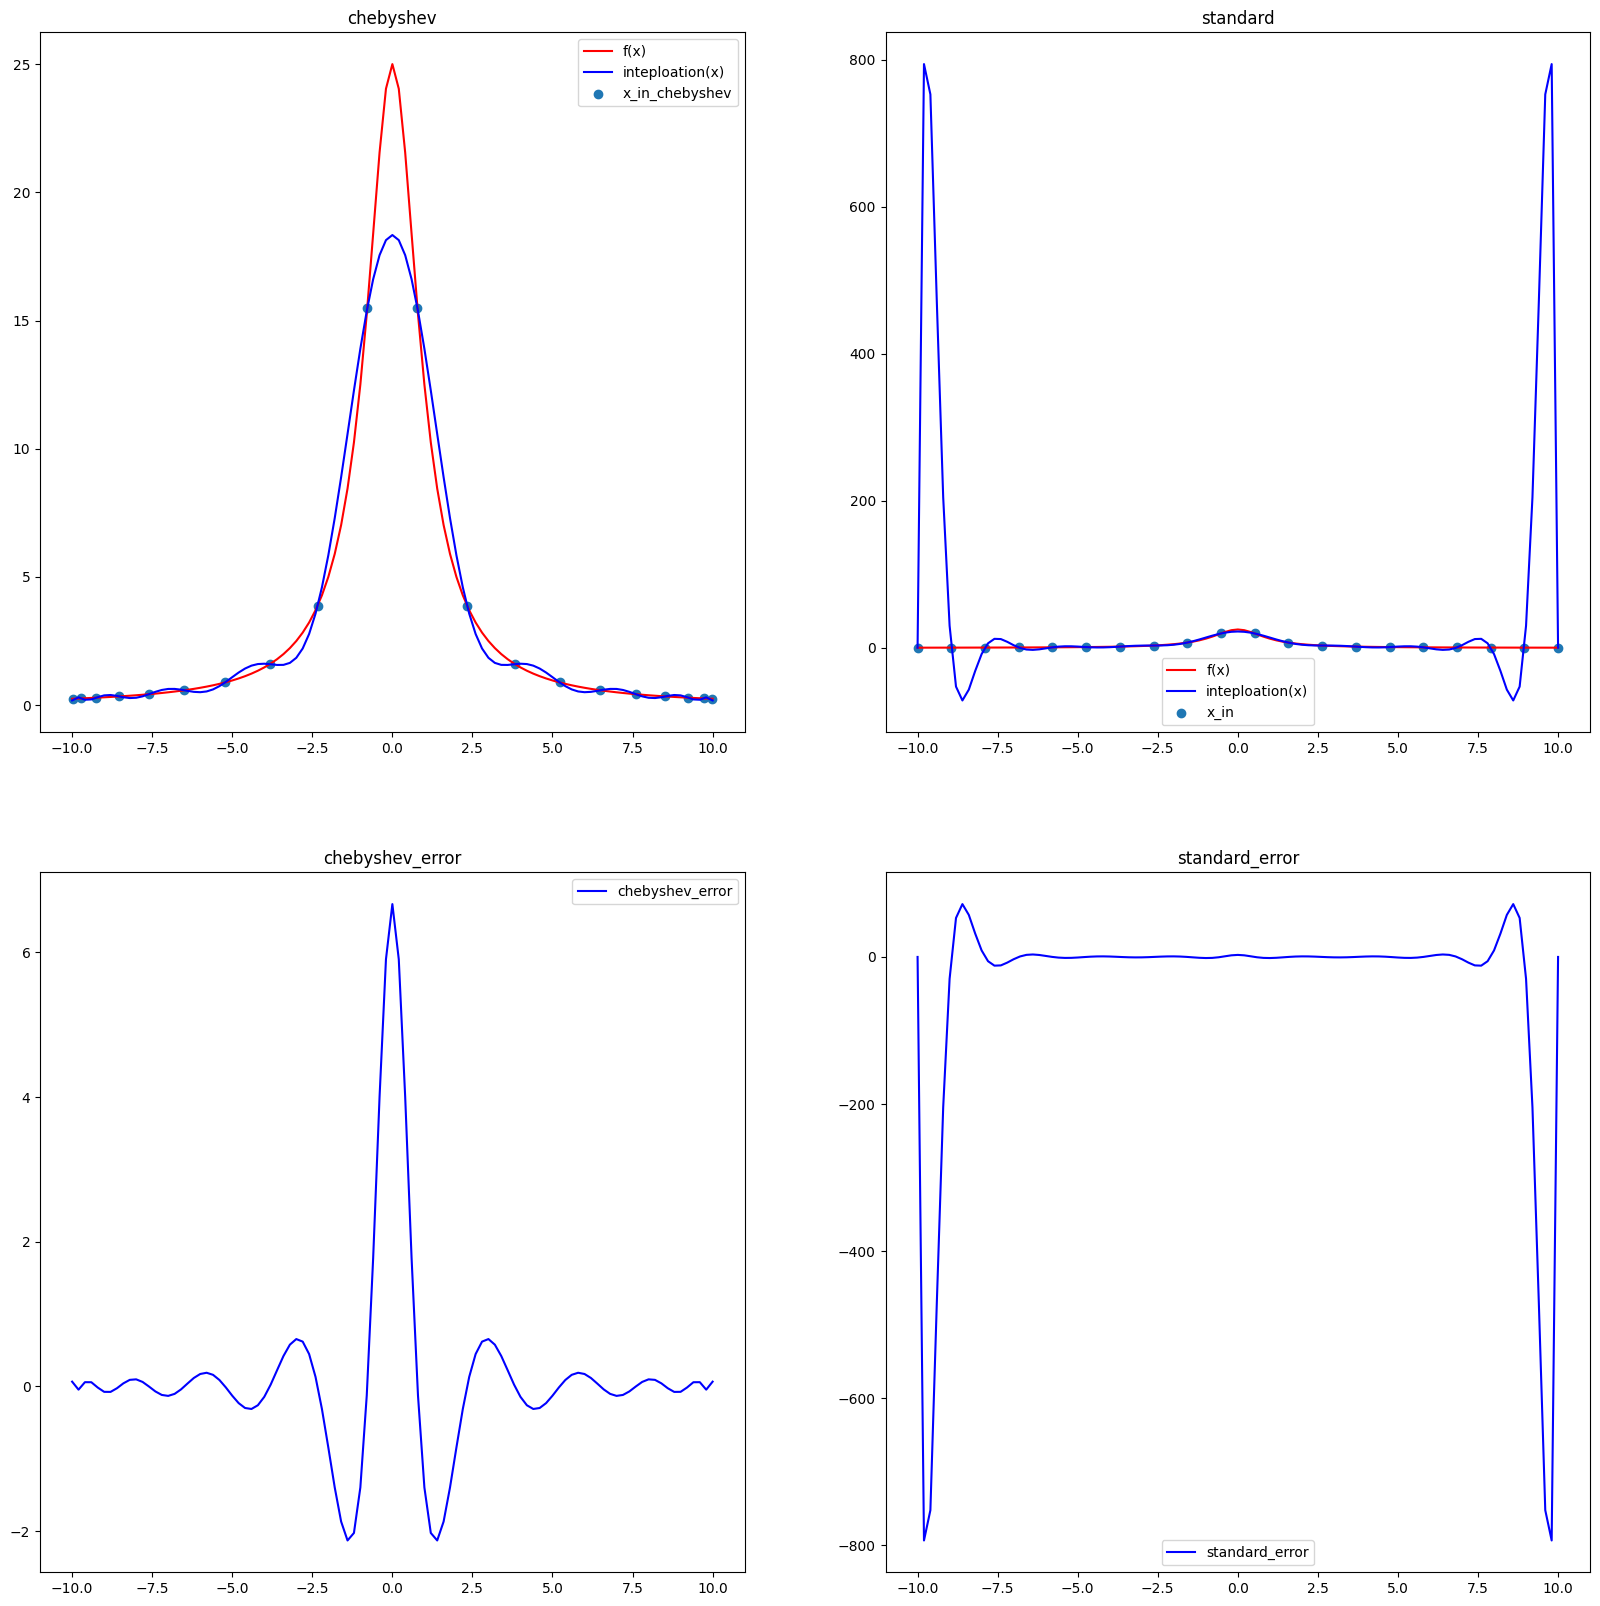

In [11]:
def get_chebyshev_points(n,a,b):
    x = np.cos(np.pi*(2*np.arange(1,n+1) - 1)/(2*n))
    x = (b-a)*0.5*x + (a+b) / 2
    return x


def f_test(x):
    return 25/(1 + x**2)

x_in_cheby = get_chebyshev_points(20,-10,10)
y_in_cheby = f_test(x_in_cheby)

x_in = np.linspace(-10,10,20)
y_in = f_test(x_in)

x = np.linspace(-10,10,101)
y = f_test(x)

y_pre = lagrange_gravity_interpolate(x_in,y_in,x)
y_pre_cheby = lagrange_gravity_interpolate(x_in_cheby,y_in_cheby,x)

y_error_pre = y - y_pre
y_error_pre_cheby = y - y_pre_cheby


plt.figure(figsize=(20,20))

plt.subplot(2,2,1).plot(x,y,'r')
plt.subplot(2,2,1).plot(x,y_pre_cheby,'b')
plt.subplot(2,2,1).scatter(x_in_cheby,y_in_cheby)
plt.subplot(2,2,1).set_title('chebyshev')
plt.subplot(2,2,1).legend(['f(x)','inteploation(x)','x_in_chebyshev'])

plt.subplot(2,2,2).plot(x,y,'r')
plt.subplot(2,2,2).plot(x,y_pre,'b')
plt.subplot(2,2,2).scatter(x_in,y_in)
plt.subplot(2,2,2).set_title('standard')
plt.subplot(2,2,2).legend(['f(x)','inteploation(x)','x_in'])

plt.subplot(2,2,3).plot(x,y_error_pre_cheby,'b')
plt.subplot(2,2,3).set_title('chebyshev_error')
plt.subplot(2,2,3).legend(['chebyshev_error'])

plt.subplot(2,2,4).plot(x,y_error_pre,'b')
plt.subplot(2,2,4).set_title('standard_error')
plt.subplot(2,2,4).legend(['standard_error'])

plt.show()

Problem 2.1\
已知:$$x = [0.2,0.4,0.6,0.8,1.0],y = [0.98,0.92,0.81,0.64,0.38]$$
试用四次牛顿插值多项式$P_4(x)$和三次样条插值$S(x)$(自然边界条件)对数据进行插值。  
用图给出${(x_i,y_i),x_i = 0.2 + 0.08i,i = 0,1,11,10},P_4(x) {\text 及} S(x)$

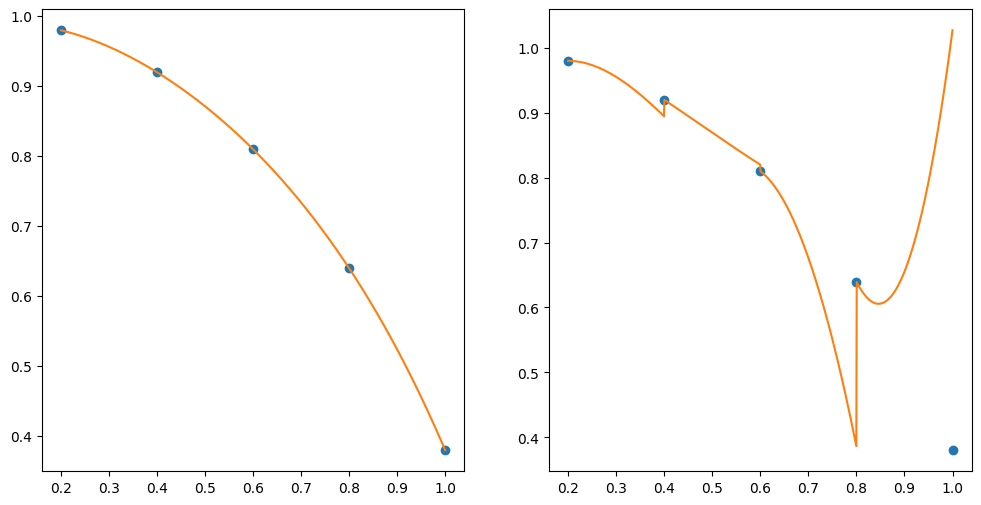

In [12]:
x_to = [0.2,0.4,0.6,0.8,1.0]
y_to = [0.98,0.92,0.81,0.64,0.38]

params = [0,1,11,10]

x_points = [0.2 + 0.08 * i for i in params]
y_to_cubic_points = list()

x_to_lin = np.linspace(0.2,1,1000)

#牛顿法
y_to_newton,_ = newton_interpolate(x_to,y_to,x_to_lin)
y_to_newton_points = [newton_interpolate(x_to,y_to,points) for points in x_points]

#三次样条法
y_to_cubic = list(map(lambda t: spline(x_to,y_to,t),x_to_lin))

for i in x_points:
    y_to_cubic_points.append(spline(x_to,y_to,i))

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(x_to,y_to,'o',label = 'data')
plt.plot(x_to_lin,y_to_newton,'-',label = 'newton_curve')

plt.subplot(1,2,2)
plt.plot(x_to,y_to,'o',label = 'data')
plt.plot(x_to_lin,y_to_cubic,'-',label = 'cubic_curve')